In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout

# Load dataset
file_path = 'C:/Users/SWEED/Downloads/archive (5)/stock_market_data/nyse/csv/WRB.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime and sort by date
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.sort_values('Date', inplace=True)

# Select relevant features
features = ['Low', 'Open', 'Volume', 'High', 'Close']
data = data[features]

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Sequence creation
def create_sequences(data, n_steps, n_future):
    X, y = [], []
    for i in range(len(data) - n_steps - n_future + 1):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps:i + n_steps + n_future, -1])  
    return np.array(X), np.array(y)

# Define hyperparameters
n_steps = 30  
n_future = 1  

X, y = create_sequences(data_scaled, n_steps, n_future)

# Split into training, validation, and testing sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (8654, 30, 5), Validation set: (1854, 30, 5), Test set: (1856, 30, 5)


In [9]:
# Build RNN model
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(50, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1)) 
    model.compile(optimizer='adam', loss='mse')
    return model
rnn_model = build_rnn_model((n_steps, X_train.shape[2]))
rnn_model.summary()
# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model
lstm_model = build_lstm_model((n_steps, X_train.shape[2]))
lstm_model.summary()

# Build GRU model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mse')
    return model
gru_model = build_gru_model((n_steps, X_train.shape[2]))
gru_model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 30, 50)              │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,151 (35.75 KB)

 Trainable params: 9,151 (35.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 30, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 50)              │           8,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,151 (98.25 KB)

 Trainable params: 25,151 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 3.3017e-04 - val_loss: 0.0018
Epoch 2/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 6.0018e-05 - val_loss: 0.0023
Epoch 3/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.1218e-05 - val_loss: 0.0013
Epoch 4/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.8522e-05 - val_loss: 0.0021
Epoch 5/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.9424e-05 - val_loss: 0.0011
Epoch 6/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.3477e-05 - val_loss: 8.1643e-04
Epoch 7/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.0623e-05 - val_loss: 0.0012
Epoch 8/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.7045e-05 - val_loss: 0.0011
Epoch 9/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.9061e-05 - val_loss: 6.9683e-04
Epoch 10/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.5871e-05 - val_loss: 0.0017
Epoch 11/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.4348e-05 - val_lo

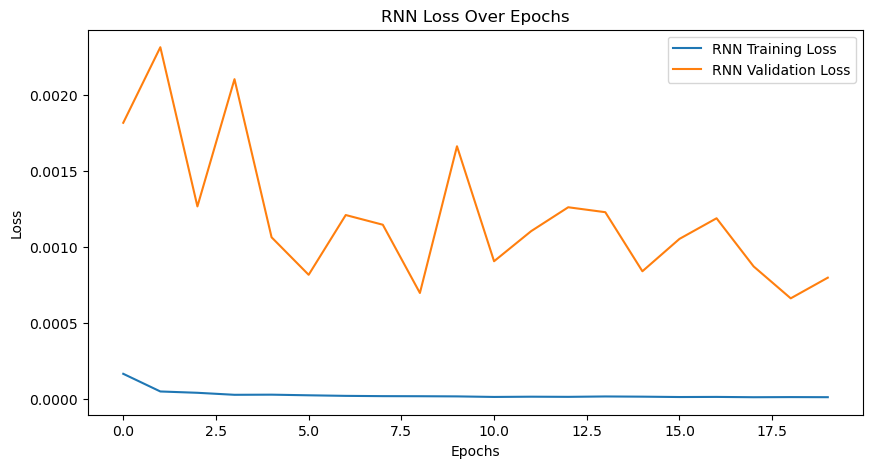

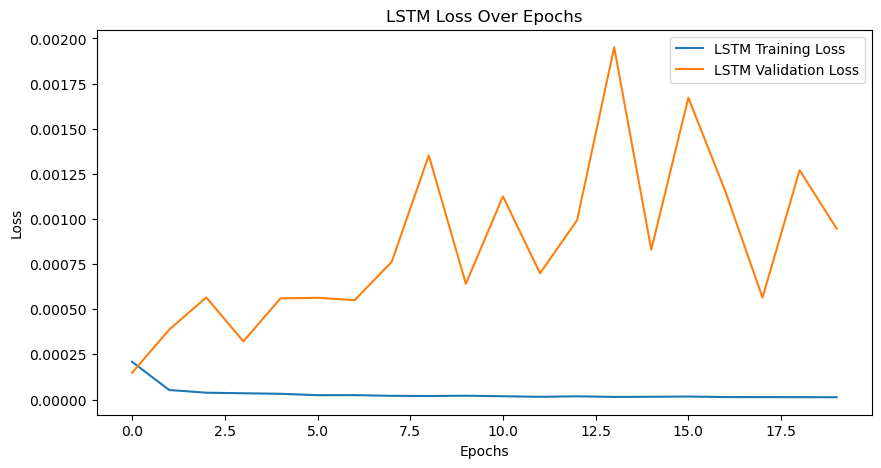

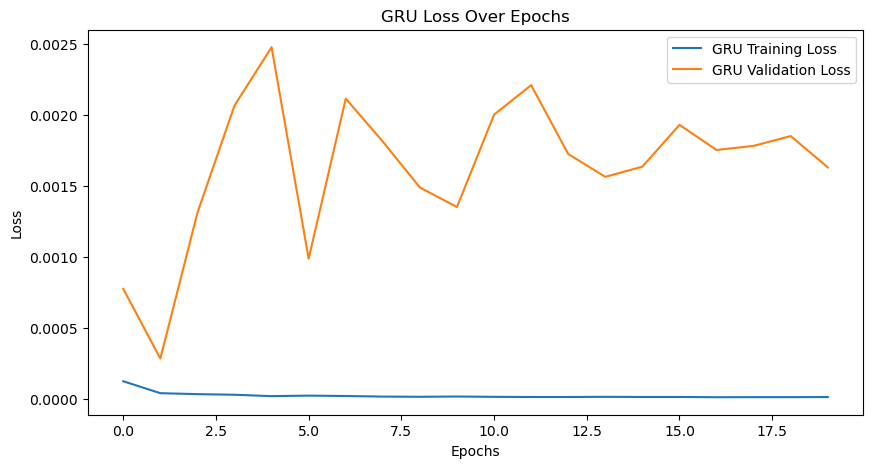

In [10]:
# Initialize models
rnn_model = build_rnn_model((n_steps, X_train.shape[2]))
lstm_model = build_lstm_model((n_steps, X_train.shape[2]))
gru_model = build_gru_model((n_steps, X_train.shape[2]))

# Train RNN model
rnn_history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Train LSTM model
lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Train GRU model
gru_history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Plot training and validation loss for RNN
plt.figure(figsize=(10, 5))
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for LSTM
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for GRU
plt.figure(figsize=(10, 5))
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [4]:
# Define evaluation function
def evaluate_model(model, X_test, y_test, scaler):
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(
        np.hstack((np.zeros((len(y_pred), 4)), y_pred.reshape(-1, 1)))
    )[:, -1]
    y_test_rescaled = scaler.inverse_transform(
        np.hstack((np.zeros((len(y_test), 4)), y_test.reshape(-1, 1)))
    )[:, -1]
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mse)
    return mse, mae, rmse, y_test_rescaled, y_pred_rescaled

# Evaluate RNN
rnn_mse, rnn_mae, rnn_rmse, rnn_y_test, rnn_y_pred = evaluate_model(rnn_model, X_test, y_test, scaler)
print(f"RNN - Test MSE: {rnn_mse}, MAE: {rnn_mae}, RMSE: {rnn_rmse}")

# Evaluate LSTM
lstm_mse, lstm_mae, lstm_rmse, lstm_y_test, lstm_y_pred = evaluate_model(lstm_model, X_test, y_test, scaler)
print(f"LSTM - Test MSE: {lstm_mse}, MAE: {lstm_mae}, RMSE: {lstm_rmse}")

# Evaluate GRU
gru_mse, gru_mae, gru_rmse, gru_y_test, gru_y_pred = evaluate_model(gru_model, X_test, y_test, scaler)
print(f"GRU - Test MSE: {gru_mse}, MAE: {gru_mae}, RMSE: {gru_rmse}")


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN - Test MSE: 97.86927046840496, MAE: 9.158715684452028, RMSE: 9.892889894687242
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM - Test MSE: 54.38296546135495, MAE: 5.354025619121601, RMSE: 7.374480690960886
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
GRU - Test MSE: 60.39246789822259, MAE: 7.436761173887801, RMSE: 7.7712590934946055


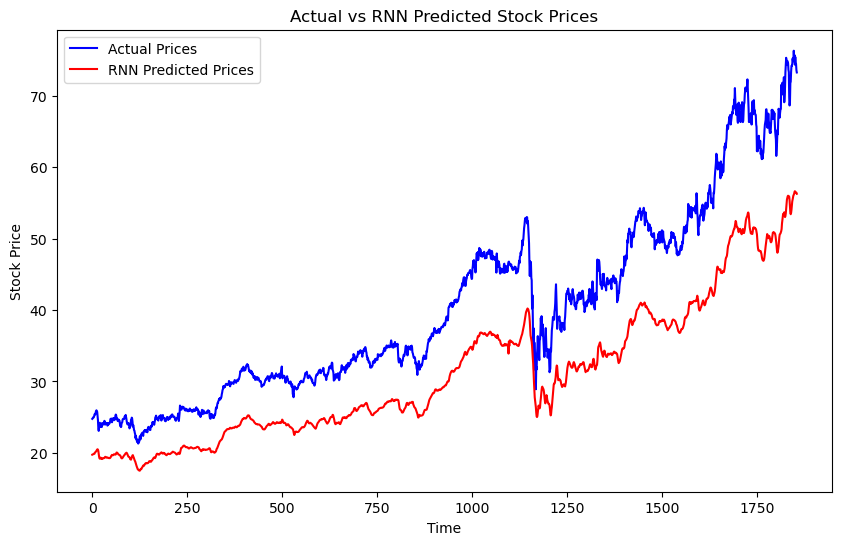

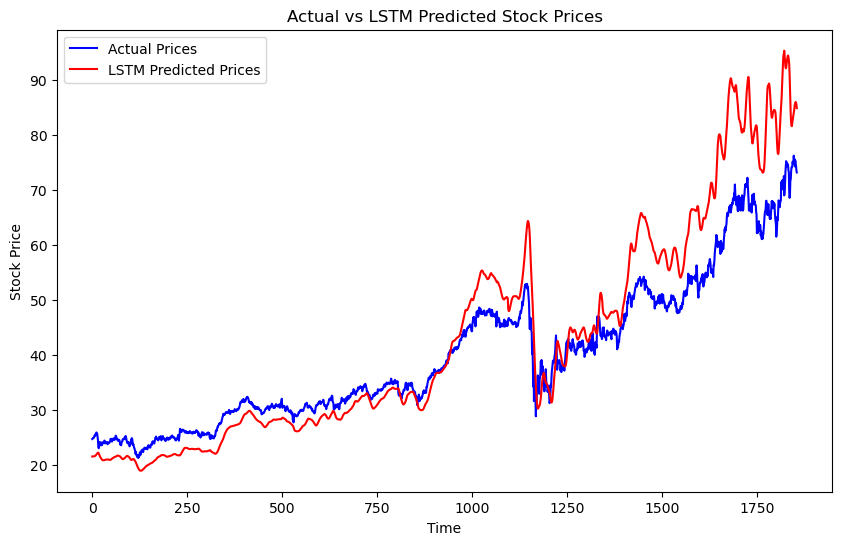

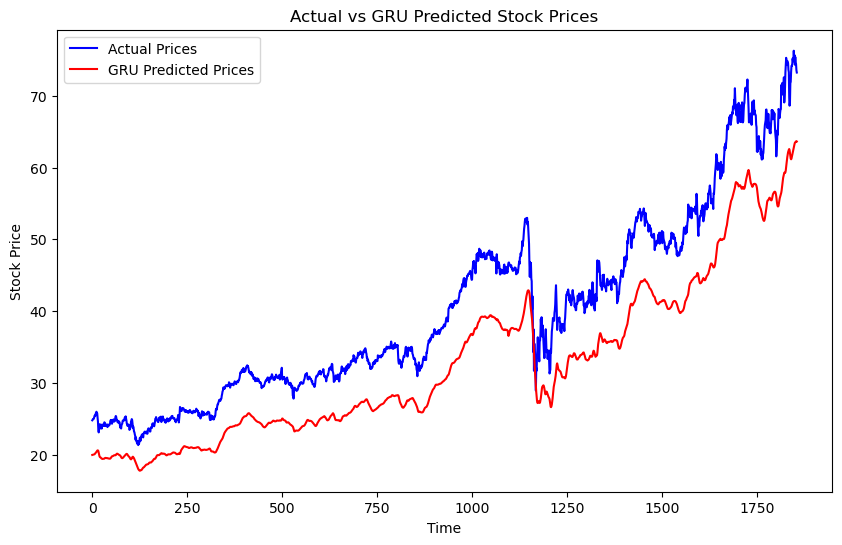

In [5]:
# Plot actual vs predicted prices for RNN
plt.figure(figsize=(10, 6))
plt.plot(rnn_y_test, label='Actual Prices', color='blue')
plt.plot(rnn_y_pred, label='RNN Predicted Prices', color='red')
plt.title('Actual vs RNN Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot actual vs predicted prices for LSTM
plt.figure(figsize=(10, 6))
plt.plot(lstm_y_test, label='Actual Prices', color='blue')
plt.plot(lstm_y_pred, label='LSTM Predicted Prices', color='red')
plt.title('Actual vs LSTM Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot actual vs predicted prices for GRU
plt.figure(figsize=(10, 6))
plt.plot(gru_y_test, label='Actual Prices', color='blue')
plt.plot(gru_y_pred, label='GRU Predicted Prices', color='red')
plt.title('Actual vs GRU Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
